In [1]:
import numpy as np
import pandas as pd

import time
import math

from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

# functions to calculate WAMP, VWAP, etc. and display plots
from functions.market.features import *
from functions.market.plots import *
from functions.preprocessing import *
from functions.evaluation import *

In [2]:
# set default values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams["figure.figsize"] = [16, 9]

**Data format:**

A - ask  
B - bid  
D - depth   
P - price  
V - volume (quantity)  
TS - last modification timestamp  

E.g.: A_D1_P - depth1 ask price = best ask price, B_D100_V = worst bid volume

| A_D1_P | A_D1_V | A_D1_TS | A_D2_P | A_D2_V | A_D2_TS | ... | A_D100_P | A_D100_V | A_D100_TS | B_D1_P | B_D1_V | B_D1_TS | ... | B_D100_P | B_D100_V | B_D1_TS | SAVE_TS |
|--------|--------|---------|--------|--------|---------|-----|----------|----------|-----------|--------|--------|---------|-----|----------|----------|---------|---------|


In [3]:
def display_snapshot(snapshot):
    print('Timestamp:\t', time.strftime('%Y/%m/%d %H:%M:%S',  time.gmtime(snapshot[600])))
    print('Mid-price:\t', calc_mid_price(snapshot))
    print('Spread:\t\t', calc_spread(snapshot))
    print('WAMP:\t\t', calc_WAMP(snapshot))
    print('VWAP:\t\t', calc_VWAP(snapshot))
    
    plot_LOB(snapshot, 100)

In [4]:
def display_day(dataset):
    wamps = [calc_WAMP(i) for i in dataset[:, :600]]
    vwaps = [calc_VWAP(i) for i in dataset[:, :600]]
    
    print('Timestamp:\t', time.strftime('%Y/%m/%d',  time.gmtime(dataset[0][600])))
    
    data = {
        'Open': [wamps[0], vwaps[0]],
        'High': [np.amax(wamps), np.amax(vwaps)],
        'Low': [np.amin(wamps), np.amin(vwaps)],
        'Close': [wamps[-1], vwaps[-1]],
        'Volatility': [calc_volatility(wamps), calc_volatility(vwaps)]
    }
    
    df = pd.DataFrame.from_dict(data, orient='index', columns=['WAMP', 'VWAP'])
    
    display(df)
    
    plot_price_movement(dataset)

In [5]:
# df = pd.read_csv('./data/kraken/xbt_usd/ss_2019-03-08.csv.gz', compression='gzip', header=None)
dataset = np.loadtxt('./data/kraken/eth_eur/ss_2019-03-15.csv.gz', delimiter=',')

Timestamp:	 2019/03/15 11:46:49
Mid-price:	 118.545
Spread:		 0.12999999999999545
WAMP:		 118.58128554733149
VWAP:		 117.92262220892096


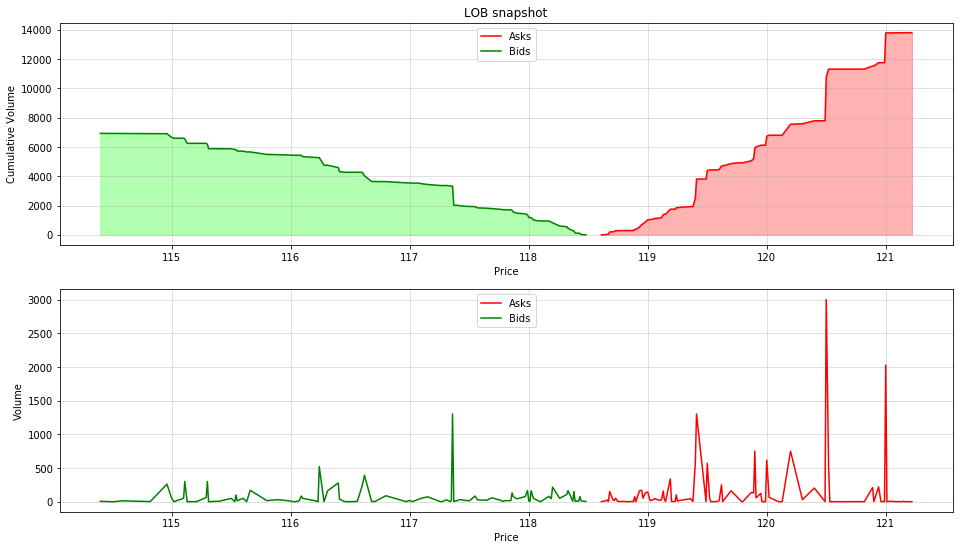

In [6]:
display_snapshot(dataset[700])

Timestamp:	 2019/03/15


,WAMP,VWAP
Open,116.320000,116.308765
High,120.819836,120.515485
Low,116.320000,116.286751
Close,119.753871,119.249870
Volatility,1.287641,1.217543


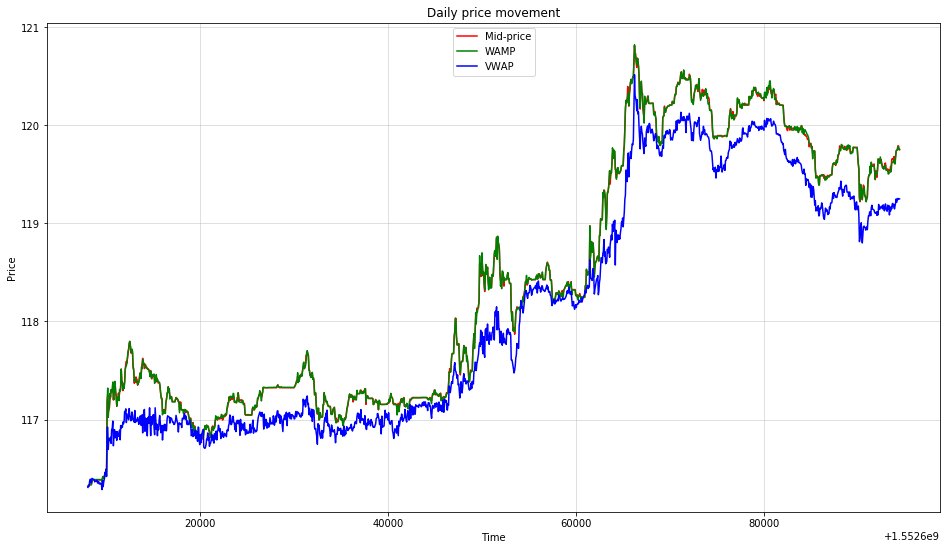

In [7]:
display_day(dataset)

In [8]:
# wamp percent - lower difference is considered as NO_MOVE
alpha = 2

delay = 100

wamps = [calc_WAMP(ss) for ss in dataset]

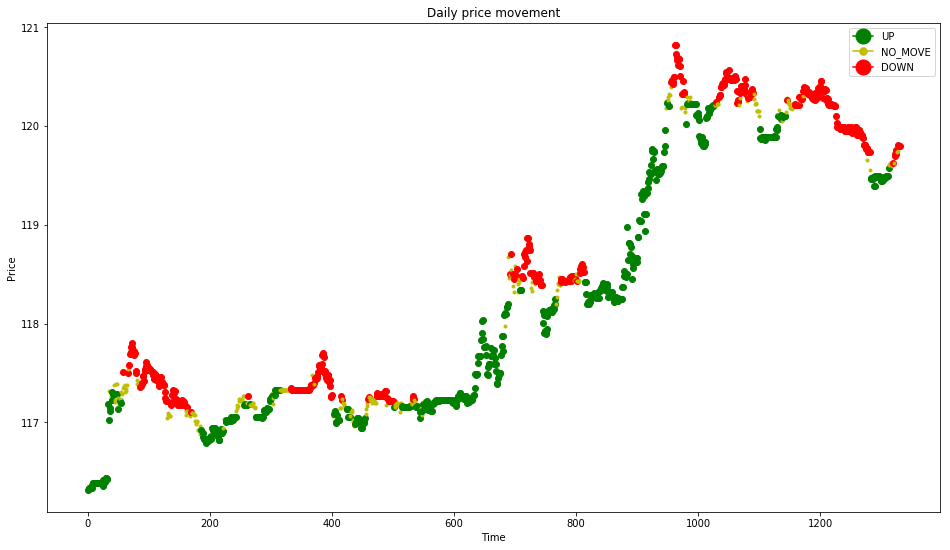

In [9]:
labels = make_labels(snapshots=dataset, add_no_move=True, alpha=alpha, delay=delay)
plot_labels(wamps[:-delay], labels)